In [1]:
import tensorflow as tf

In [8]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense,Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later

T = 10
D = 1
X = []
Y = []

def get_label(x,i1,i2,i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,-1,-2,-3) # short distance
  # y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [5]:
#Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy']
)

#train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5094 - loss: 0.7926 - val_accuracy: 0.5124 - val_loss: 0.7051
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5162 - loss: 0.6963 - val_accuracy: 0.5108 - val_loss: 0.6946
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5281 - loss: 0.6904 - val_accuracy: 0.5028 - val_loss: 0.6953
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5195 - loss: 0.6947 - val_accuracy: 0.5176 - val_loss: 0.6949
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 0.6919 - val_accuracy: 0.5184 - val_loss: 0.6937
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5222 - loss: 0.6929 - val_accuracy: 0.5272 - val_loss: 0.6952
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5240 - loss: 0.6914 - val_accuracy: 0.5276 - val_loss: 0.6946
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5388 - loss: 0.6912 - val_accuracy: 0.5208 - v

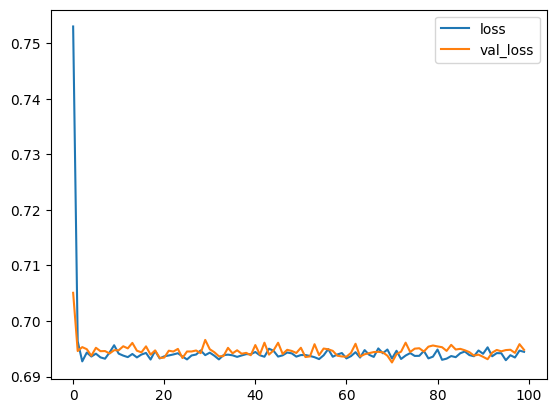

In [6]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

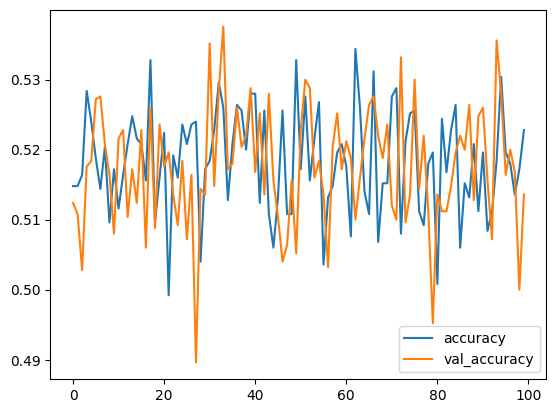

In [7]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [9]:
# Now try a simple RNN
inputs = np.expand_dims(X,-1)

# male the RNN
i = Input(shape=(T,D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1,momentum=0.9),
  metrics=['accuracy'],
)

In [10]:
# Train the RNN

r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5310 - loss: 0.7044 - val_accuracy: 0.6516 - val_loss: 0.6482
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6774 - loss: 0.6382 - val_accuracy: 0.7056 - val_loss: 0.5997
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7395 - loss: 0.5841 - val_accuracy: 0.7624 - val_loss: 0.5523
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7656 - loss: 0.5421 - val_accuracy: 0.7608 - val_loss: 0.5073
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8050 - loss: 0.4788 - val_accuracy: 0.8068 - val_loss: 0.4298
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8411 - loss: 0.4057 - val_accuracy: 0.8532 - val_loss: 0.3608
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8648 - loss: 0.3461 - val_accuracy: 0.8860 - val_loss: 0.2986
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9113 - loss: 0.2697 - val_accuracy: 0.9052 

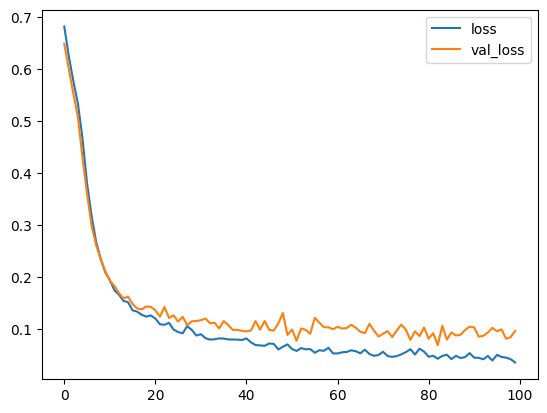

In [11]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

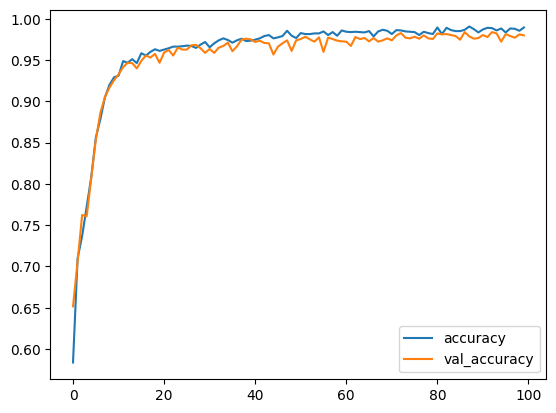

In [12]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [14]:
# Now test our Simple RNN again
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = SimpleRNN(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4869 - loss: 0.7109 - val_accuracy: 0.5064 - val_loss: 0.6940
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5063 - loss: 0.6935 - val_accuracy: 0.5188 - val_loss: 0.6930
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5139 - loss: 0.6935 - val_accuracy: 0.5176 - val_loss: 0.6924
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5355 - loss: 0.6900 - val_accuracy: 0.5336 - val_loss: 0.6933
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5649 - loss: 0.6791 - val_accuracy: 0.6400 - val_loss: 0.6386
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6437 - loss: 0.6281 - val_accuracy: 0.6672 - val_loss: 0.6160
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5810 - val_accuracy: 0.7264 - val_loss: 0.5491
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7310 - loss: 0.5376 - val_accuracy: 0.7192 

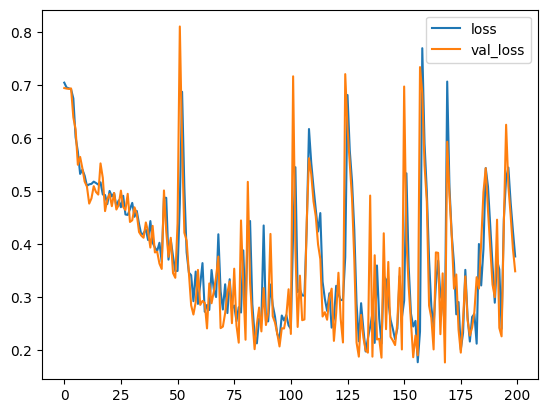

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

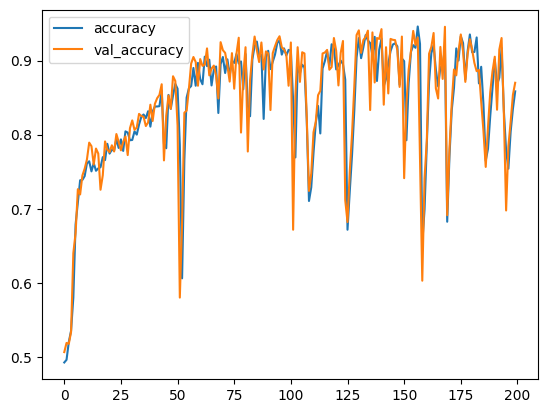

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [17]:
# Now test our LSTM
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# LSTM long distance patterns için yapıldı

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4931 - loss: 0.6942 - val_accuracy: 0.5088 - val_loss: 0.6929
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5052 - loss: 0.6936 - val_accuracy: 0.5080 - val_loss: 0.6931
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5001 - loss: 0.6937 - val_accuracy: 0.5156 - val_loss: 0.6932
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5063 - loss: 0.6929 - val_accuracy: 0.5180 - val_loss: 0.6934
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.5120 - val_loss: 0.6932
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5120 - loss: 0.6929 - val_accuracy: 0.5096 - val_loss: 0.6932
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5027 - loss: 0.6948 - val_accuracy: 0.5108 - val_loss: 0.6933
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5041 - loss: 0.6928 - val_accuracy: 0.5092 -

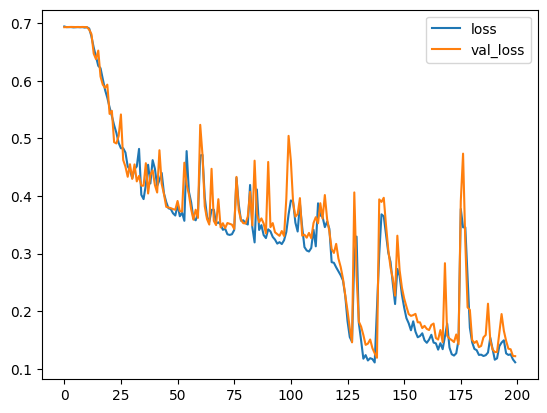

In [18]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

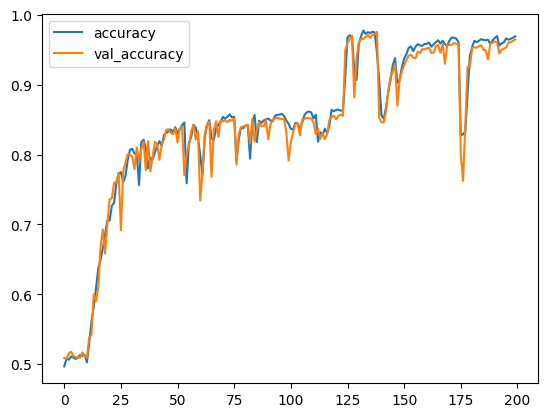

In [19]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

----

In [20]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [21]:
# Now test our Simple RNN again
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = SimpleRNN(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4920 - loss: 0.7089 - val_accuracy: 0.4916 - val_loss: 0.6959
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5002 - loss: 0.6955 - val_accuracy: 0.5024 - val_loss: 0.6944
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4989 - loss: 0.6989 - val_accuracy: 0.5188 - val_loss: 0.6962
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5245 - loss: 0.6945 - val_accuracy: 0.5100 - val_loss: 0.6927
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4902 - loss: 0.6956 - val_accuracy: 0.5064 - val_loss: 0.6939
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5237 - loss: 0.6948 - val_accuracy: 0.5172 - val_loss: 0.6936
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5296 - loss: 0.6915 - val_accuracy: 0.5116 - val_loss: 0.6927
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5079 - loss: 0.6927 - val_accuracy: 0.5108 - 

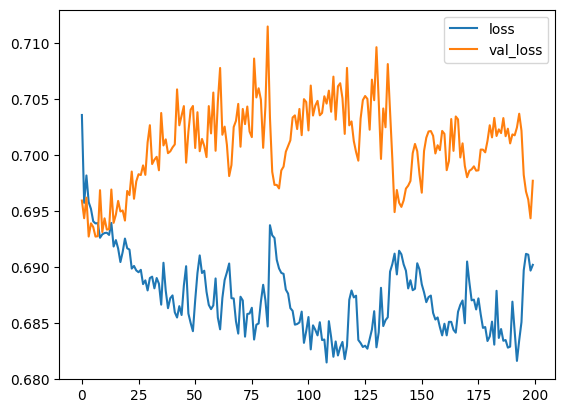

In [22]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

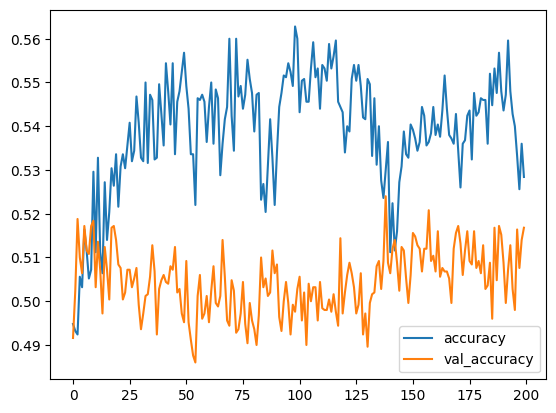

In [23]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [24]:
# Now test our LSTM
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# LSTM long distance patterns için yapıldı

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4970 - loss: 0.6943 - val_accuracy: 0.4988 - val_loss: 0.6942
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5020 - loss: 0.6928 - val_accuracy: 0.4996 - val_loss: 0.6936
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5231 - loss: 0.6925 - val_accuracy: 0.4972 - val_loss: 0.6940
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5099 - loss: 0.6931 - val_accuracy: 0.5028 - val_loss: 0.6940
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5308 - loss: 0.6923 - val_accuracy: 0.5024 - val_loss: 0.6941
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5339 - loss: 0.6914 - val_accuracy: 0.5052 - val_loss: 0.6940
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5141 - loss: 0.6929 - val_accuracy: 0.5064 - val_loss: 0.6945
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5136 - loss: 0.6911 - val_accuracy: 0.

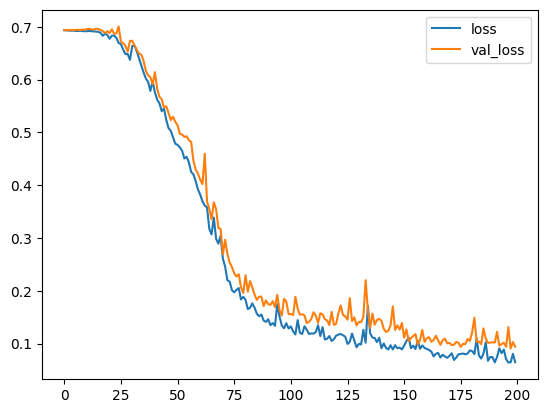

In [25]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

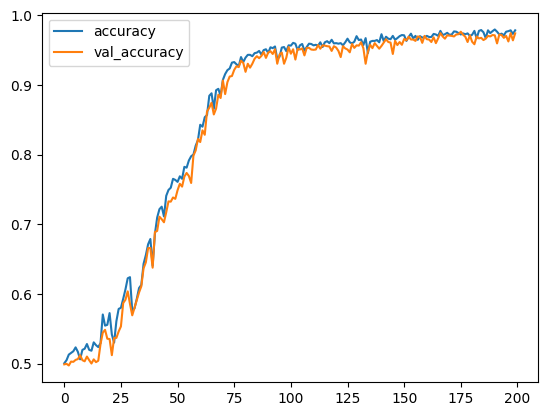

In [26]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

-----

In [27]:
# Now test our GRU
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = GRU(5)(i)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4960 - loss: 0.6948 - val_accuracy: 0.5016 - val_loss: 0.6945
Epoch 2/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5060 - loss: 0.6935 - val_accuracy: 0.4984 - val_loss: 0.6933
Epoch 3/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5156 - loss: 0.6926 - val_accuracy: 0.5012 - val_loss: 0.6935
Epoch 4/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5111 - loss: 0.6928 - val_accuracy: 0.5016 - val_loss: 0.6942
Epoch 5/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4912 - loss: 0.6938 - val_accuracy: 0.5036 - val_loss: 0.6938
Epoch 6/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5246 - loss: 0.6931 - val_accuracy: 0.5088 - val_loss: 0.6943
Epoch 7/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4957 - loss: 0.6953 - val_accuracy: 0.5008 - val_loss: 0.6951
Epoch 8/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.

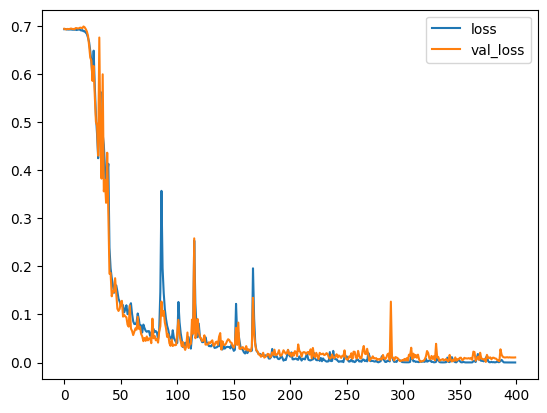

In [28]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

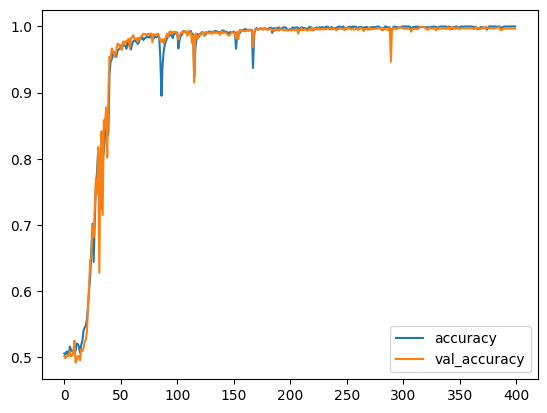

In [29]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

----

In [30]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [31]:
# Now test our LSTM
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# LSTM long distance patterns için yapıldı

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5003 - loss: 0.6957 - val_accuracy: 0.4980 - val_loss: 0.6939
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5084 - loss: 0.6933 - val_accuracy: 0.5100 - val_loss: 0.6934
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5076 - loss: 0.6933 - val_accuracy: 0.4908 - val_loss: 0.6940
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5141 - loss: 0.6926 - val_accuracy: 0.4892 - val_loss: 0.6943
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5128 - loss: 0.6930 - val_accuracy: 0.4988 - val_loss: 0.6941
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5057 - loss: 0.6926 - val_accuracy: 0.4968 - val_loss: 0.6936
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5112 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5105 - loss: 0.6923 - val_accuracy: 0.

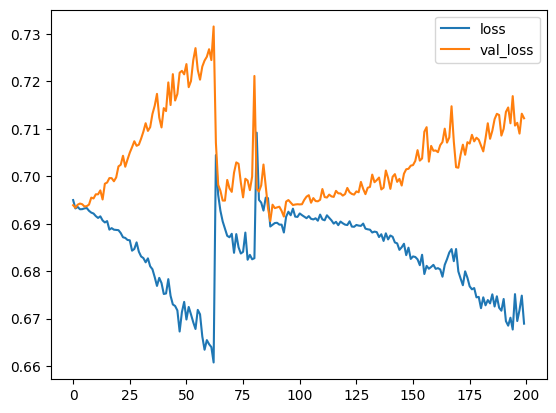

In [34]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

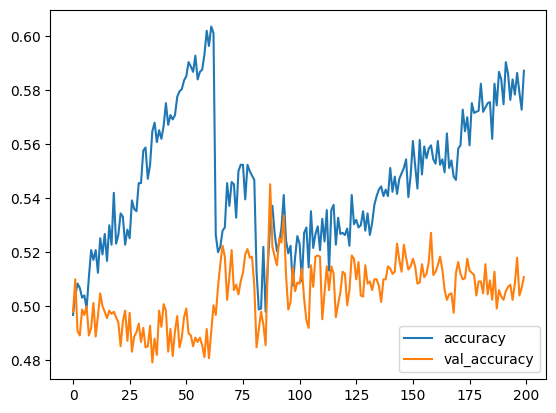

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

----

In [35]:
# Now test our LSTM with Glabal Max Pooling
inputs = np.expand_dims(X,-1)

# make the RNN
i = Input(shape=(T,D))

#method 2
x = LSTM(5,return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5106 - loss: 0.6994 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4984 - loss: 0.6946 - val_accuracy: 0.5160 - val_loss: 0.6932
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5158 - loss: 0.6939 - val_accuracy: 0.5172 - val_loss: 0.6940
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5058 - loss: 0.6920 - val_accuracy: 0.5152 - val_loss: 0.6928
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5190 - loss: 0.6914 - val_accuracy: 0.5016 - val_loss: 0.6932
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5095 - loss: 0.6928 - val_accuracy: 0.4876 - val_loss: 0.6925
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4945 - loss: 0.6909 - val_accuracy: 0.5196 - val_loss: 0.6930
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5280 - loss: 0.6891 - val_accuracy: 0.

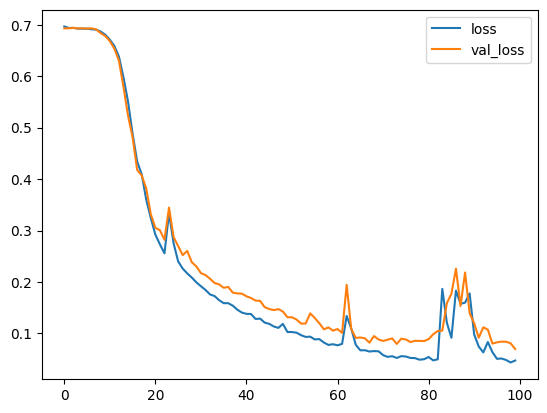

In [36]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

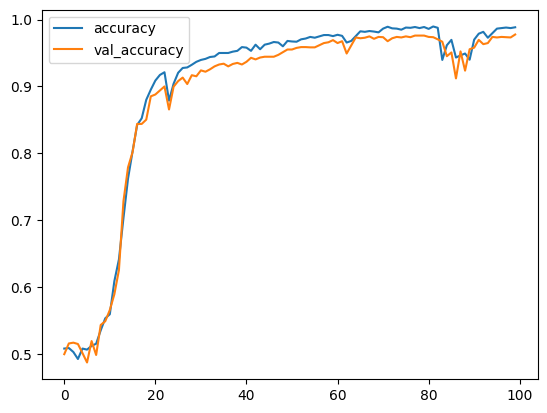

In [37]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()